# Predictive Modeling of Hospital Length of Stay and Discharge Type
# [Step 4: Explore merged data set]

## 1. Import libraries and load dataset

In [23]:
# Import data manipulation library
import pandas as pd
import numpy as np
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set data path 
merged_data_path = "/home/anna/Desktop/Master_thesis/output_data/merged_data"  

# Load merged dataset
merged_data = pd.read_csv(merged_data_path)

In [3]:
merged_data.head()

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis,diagnosis_category,ALAT,AP,...,Quicks,RDWn,THZn,TNThsn,Tbga,UREA,pCO2,pH,pO2,tHb
0,1,171465,Entlassung,f,73,28,A04.70,Infectious diseases,10.0,NaN,...,13.2,18.3,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,333396,Entlassung,f,73,34,K57.22,Digestive diseases,19.0,93.0,...,11.6,18.8,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,27091,Entlassung,m,51,13,T84.5,Injury & poisoning,NaN,NaN,...,14.0,18.9,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,36154,Entl.ext.Instit,m,50,12,I21.4,Circulatory diseases,38.0,58.0,...,12.7,14.4,131.0,367.0,NaN,4.5,NaN,NaN,NaN,NaN
4,2,142617,Entl. in ex.KH,m,51,1,T84.5,Injury & poisoning,15.0,65.0,...,19.2,17.6,159.0,NaN,NaN,5.2,NaN,NaN,NaN,NaN


## 2. General statistics

### 2.1 Age and sex

Overall, the data suggests that males in the dataset tend to be slightly older than females on average, with a higher median age. Additionally, while females show more age variability, males have a more concentrated age distribution. Both sexes have patients ranging from 18 to over 100 years old, indicating a wide age range in both groups.

In [4]:
print(f"Summary statistics for the entire dataset:")
display(merged_data['age'].describe())

print(f"\nSummary statistics for age, separated by sex:")
display(merged_data.groupby('sex')['age'].describe())


Summary statistics for the entire dataset:


count    268987.000000
mean         62.595947
std          18.686972
min          18.000000
25%          50.000000
50%          66.000000
75%          77.000000
max         108.000000
Name: age, dtype: float64


Summary statistics for age, separated by sex:


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,125078.0,61.033939,20.600825,18.0,43.0,65.0,78.0,108.0
m,143909.0,63.953561,16.729901,18.0,54.0,67.0,76.0,106.0


In [5]:
sex_counts = merged_data['sex'].value_counts()

# Calculate the percentage
sex_percentage = (sex_counts / sex_counts.sum()) * 100

# Print the results
print(f"Number of Women: {sex_counts.get('f', 0)}")
print("Percentage of Women: {:.2f}%".format(sex_percentage.get('f', 0)))

print(f"\nNumber of Men: {sex_counts.get('m', 0)}")
print("Percentage of Men: {:.2f}%".format(sex_percentage.get('m', 0)))


Number of Women: 125078
Percentage of Women: 46.50%

Number of Men: 143909
Percentage of Men: 53.50%


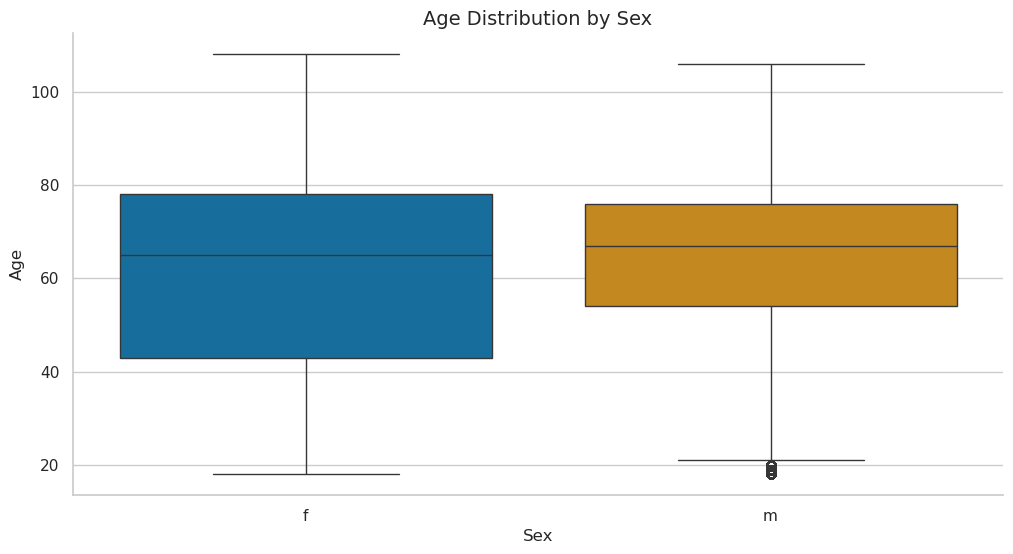

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x="sex", y="age", data=merged_data, hue="sex", palette="colorblind")
sns.despine()
plt.xlabel("Sex", fontsize=12, fontweight="normal")
plt.ylabel("Age", fontsize=12, fontweight="normal")
plt.title("Age Distribution by Sex", fontsize=14, fontweight="medium")
plt.show()

### 2.2 Patients and cases

In [7]:
print(f"Number of unique patients: {merged_data['patient_id'].nunique()}\n")

print(f"Number of unique cases: {merged_data['case_id'].nunique()}")

Number of unique patients: 151389

Number of unique cases: 268987


The majority of patients have at most two hospital visits, with **2** visits considered as separate cases if they are more than 15 days apart.

Out of all patients, **24,752** have more than two cases, which represents **16.35%** of the total patient population.

In [8]:
# Count the number of cases per patient
case_counts = merged_data.groupby('patient_id')['case_id'].nunique()

case_counts.describe()

count    151389.000000
mean          1.776794
std           1.686258
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          47.000000
Name: case_id, dtype: float64

In [9]:
# Filter the patients with more than 2 cases
patients_with_more_than_2_cases = case_counts[case_counts > 2]

# Get the number of such patients
num_patients_more_than_2 = patients_with_more_than_2_cases.count()

# Get the total number of patients
total_patients = case_counts.count()

# Calculate the percentage of patients with more than 2 cases
percentage_patients_more_than_2 = (num_patients_more_than_2 / total_patients) * 100

# Print the results
print(f"Number of patients with more than 2 cases: {num_patients_more_than_2}")
print(f"Percentage of patients with more than 2 cases: {percentage_patients_more_than_2:.2f}%")

Number of patients with more than 2 cases: 24752
Percentage of patients with more than 2 cases: 16.35%


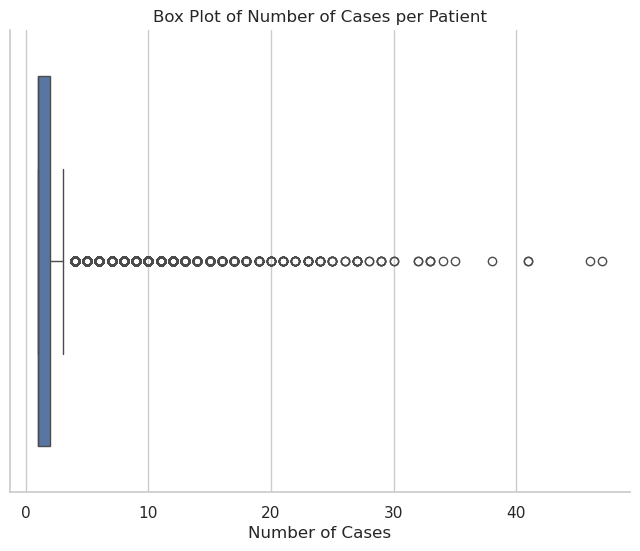

In [10]:
# Box plot for number of cases per patient
plt.figure(figsize=(8, 6))
sns.boxplot(x=case_counts)
# Remove top and right spines
sns.despine()
plt.title('Box Plot of Number of Cases per Patient')
plt.xlabel('Number of Cases')
plt.show()

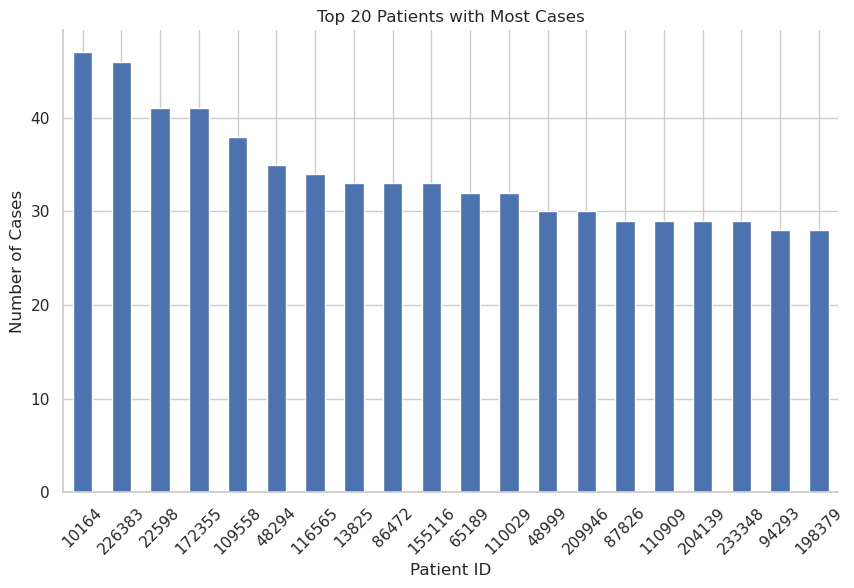

In [11]:
# Get the top n patients with the most cases
n = 20 # Define number of top n patients
top_n_patients = case_counts.nlargest(n)

# Bar plot for top N patients
plt.figure(figsize=(10, 6))
top_n_patients.plot(kind='bar')
sns.despine()
plt.title(f'Top {n} Patients with Most Cases')
plt.xlabel('Patient ID')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Display the patient with the highest number of cases
merged_data[(merged_data['patient_id'] == 10164)].sort_values(by='age')

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis,diagnosis_category,ALAT,AP,...,Quicks,RDWn,THZn,TNThsn,Tbga,UREA,pCO2,pH,pO2,tHb
10767,10164,4059,Entlassung,m,60,17,D59.1,Blood & immune disorders,23.0,79.0,...,NaN,19.7,200.0,33.56,NaN,7.5,NaN,NaN,NaN,NaN
10809,10164,335009,Entlassung,m,60,4,J18.8,Respiratory diseases,89.0,68.0,...,NaN,18.4,208.0,NaN,NaN,7.2,NaN,NaN,NaN,144.0
10805,10164,319876,Entlassung,m,60,12,D59.0,Blood & immune disorders,14.0,74.0,...,NaN,18.6,255.0,NaN,NaN,7.3,NaN,NaN,NaN,129.0
10798,10164,272768,Entlassung,m,60,5,R50.80,Symptoms & abnormal findings,30.0,62.0,...,NaN,20.6,163.0,35.28,NaN,8.4,NaN,NaN,NaN,115.0
10793,10164,260545,Entlassung,m,60,9,J18.8,Respiratory diseases,26.0,71.0,...,NaN,19.3,213.0,23.82,NaN,7.9,NaN,NaN,NaN,NaN
10774,10164,77986,Entlassung,m,60,1,J44.81,Respiratory diseases,32.0,78.0,...,NaN,18.2,211.0,NaN,NaN,8.2,NaN,NaN,NaN,NaN
10790,10164,239583,Entlassung,m,60,4,J44.01,Respiratory diseases,24.0,74.0,...,NaN,17.7,259.0,19.84,NaN,5.4,NaN,NaN,NaN,NaN
10773,10164,77298,Entlassung,m,60,7,M05.80,Musculoskeletal diseases,36.0,81.0,...,NaN,19.6,224.0,NaN,NaN,10.1,NaN,NaN,NaN,NaN
10771,10164,47245,Entlassung,m,61,5,J44.01,Respiratory diseases,16.0,53.0,...,NaN,19.0,206.0,NaN,NaN,5.0,NaN,NaN,NaN,100.0
10789,10164,217298,Entlassung,m,61,5,M05.99,Musculoskeletal diseases,32.0,72.0,...,NaN,18.6,242.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN


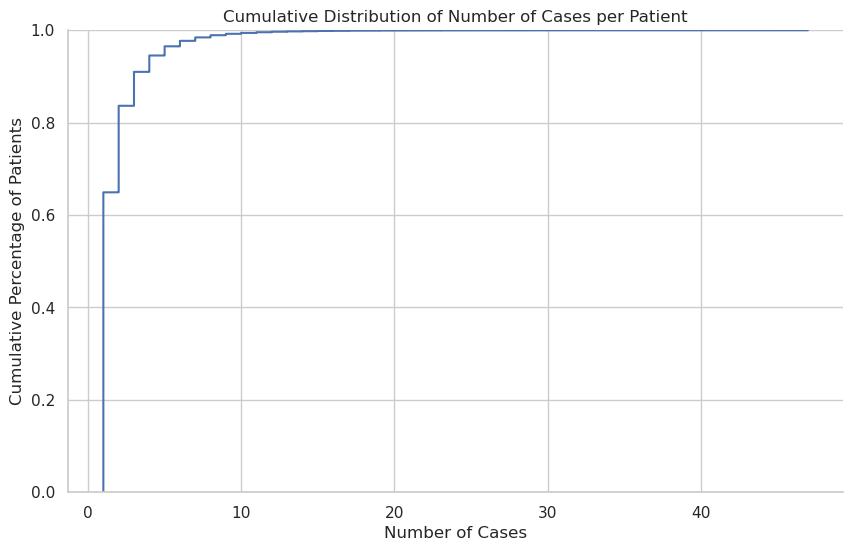

In [13]:
# Cumulative distribution plot
plt.figure(figsize=(10, 6))
sns.ecdfplot(case_counts)
sns.despine()
plt.title('Cumulative Distribution of Number of Cases per Patient')
plt.xlabel('Number of Cases')
plt.ylabel('Cumulative Percentage of Patients')
plt.show()


### 2.3 Discharge type and relation with LOS and diagnosis

Note: For the modeling step, only the following discharge types will be retained:

    Entlassung → Discharge
    Entl.ext.Instit → Discharge to another institution
    Entl. in ex.KH → Discharge to another hospital
    Verstorben → Deceased

In [14]:
# Mapping of discharge types from German to English
discharge_translation = {
    "Entlassung": "Discharge",
    "Entl.ext.Instit": "Discharge to another institution",
    "Entl. in ex.KH": "Discharge to another hospital",
    "Verstorben": "Deceased",
    "Entl. Tarifbere": "Discharge tariff status",
    "Entl.eigner Wun": "Discharge on patient’s own request",
    "Wartepat. Entl.": "Discharge of a waiting patient",
    "Ambulanz exInst": "Ambulance to external institution",
    "Rückv n. ambBeh": "Transfer back from another institution",
    "Besuch Krankh.": "Visit to the hospital"
}

# Create discharge counts DataFrame with the translation column
discharge_counts = merged_data['discharge_type'].value_counts().reset_index()
discharge_counts.columns = ['discharge_type', 'Count']
discharge_counts['Percentage (%)'] = (discharge_counts['Count'] / discharge_counts['Count'].sum()) * 100
discharge_counts['discharge_type_translated'] = discharge_counts['discharge_type'].map(discharge_translation)

# Sort by Count (most to least frequent)
discharge_counts = discharge_counts.sort_values(by='Count', ascending=False)

# Display the discharge counts DataFrame with translations
display(discharge_counts)

# Now, translate the discharge type column in merged_data
merged_data['discharge_type'] = merged_data['discharge_type'].map(discharge_translation)


,discharge_type,Count,Percentage (%),discharge_type_translated
0,Entlassung,193366,71.886745,Discharge
1,Entl.ext.Instit,31827,11.832170,Discharge to another institution
2,Entl. in ex.KH,31767,11.809864,Discharge to another hospital
3,Verstorben,6835,2.541015,Deceased
4,Entl. Tarifbere,3367,1.251733,Discharge tariff status
5,Entl.eigner Wun,1704,0.633488,Discharge on patient’s own request
6,Wartepat. Entl.,96,0.035689,Discharge of a waiting patient
7,Ambulanz exInst,20,0.007435,Ambulance to external institution
8,Rückv n. ambBeh,3,0.001115,Transfer back from another institution
9,Besuch Krankh.,2,0.000744,Visit to the hospital


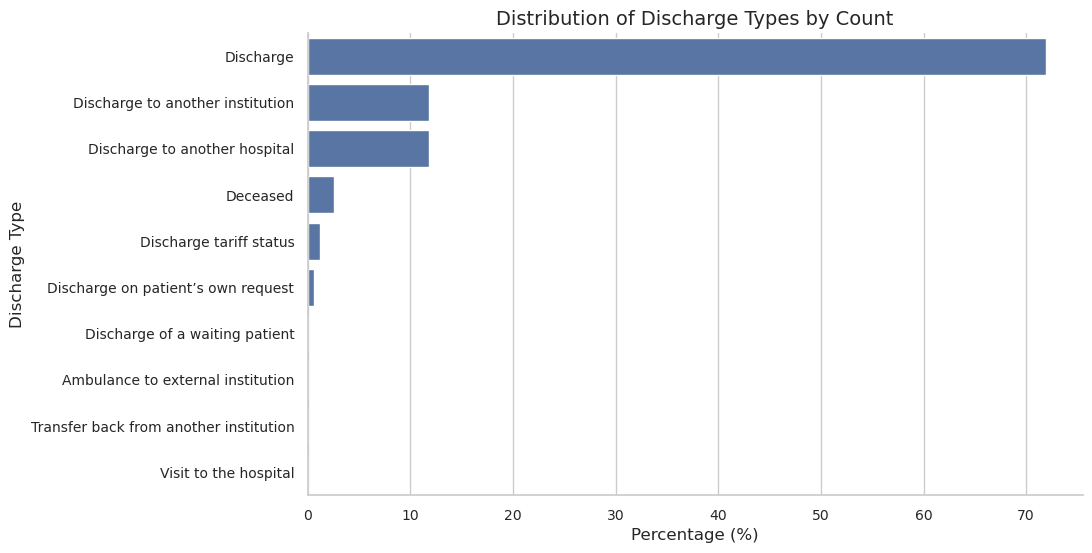

In [15]:
# Plot the distribution of Discharge Type counts (sorted)
plt.figure(figsize=(10, 6))
sns.barplot(y='discharge_type_translated', x='Percentage (%)', data=discharge_counts)
plt.title('Distribution of Discharge Types by Count', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Discharge Type', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

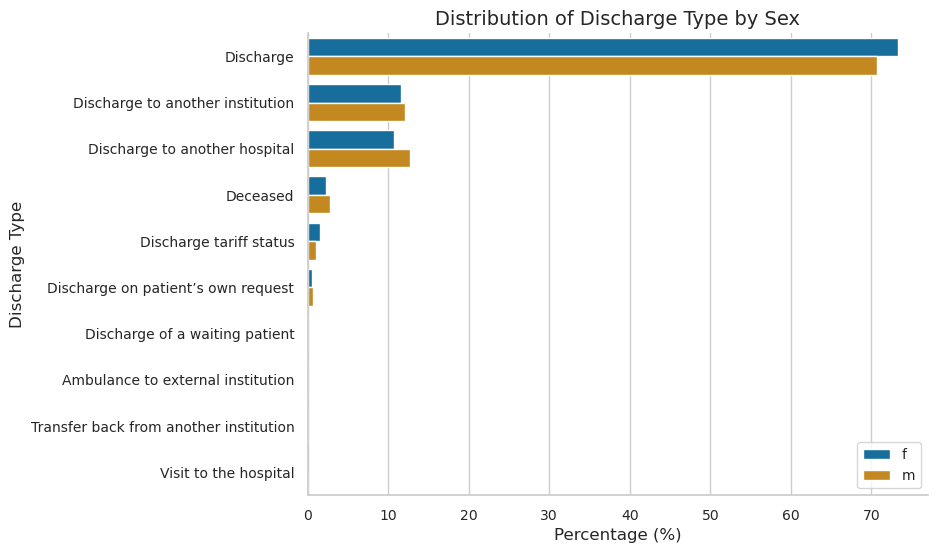

In [16]:
# Calculate the count of each discharge type by sex
discharge_counts_by_sex = merged_data.groupby(['sex', 'discharge_type']).size().reset_index(name='count')
# Calculate the total count of each sex group
total_counts_by_sex = discharge_counts_by_sex.groupby('sex')['count'].transform('sum')
# Compute the percentage for each discharge type within each sex group
discharge_counts_by_sex['percentage'] = (discharge_counts_by_sex['count'] / total_counts_by_sex) * 100
# Sort discharge types by the total count
discharge_type_order = discharge_counts_by_sex.groupby('discharge_type')['count'].sum().sort_values(ascending=False).index

# Plot the distribution of discharge type by sex, sorted by frequency
plt.figure(figsize=(8, 6))
sns.barplot(x='percentage', y='discharge_type', hue='sex', data=discharge_counts_by_sex, palette='colorblind', order=discharge_type_order)
plt.title('Distribution of Discharge Type by Sex', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Discharge Type', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='lower right', fontsize=10)
sns.despine()
plt.show()

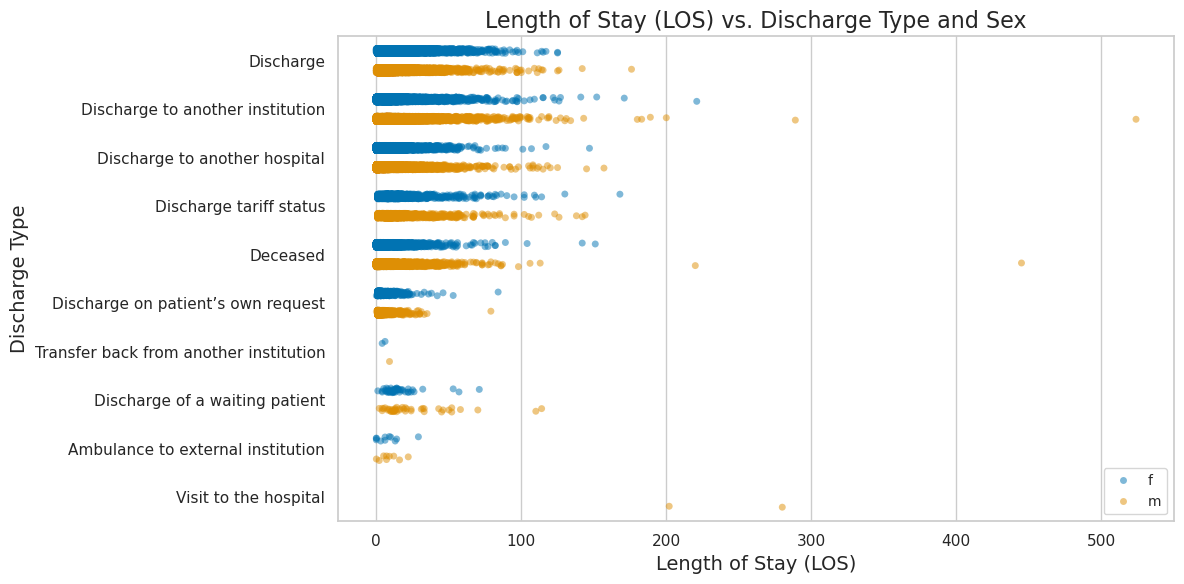

In [17]:
plt.figure(figsize=(12, 6))
sns.stripplot(y='discharge_type', x='length_of_stay_days', hue='sex', data=merged_data, jitter=True, palette='colorblind', dodge=True, alpha=0.5)
plt.title('Length of Stay (LOS) vs. Discharge Type and Sex', fontsize=16)
plt.ylabel('Discharge Type', fontsize=14)
plt.xlabel('Length of Stay (LOS)', fontsize=14)
#plt.xlim(0, 200)
plt.tight_layout()
plt.legend(loc='lower right', fontsize=10)
plt.show()

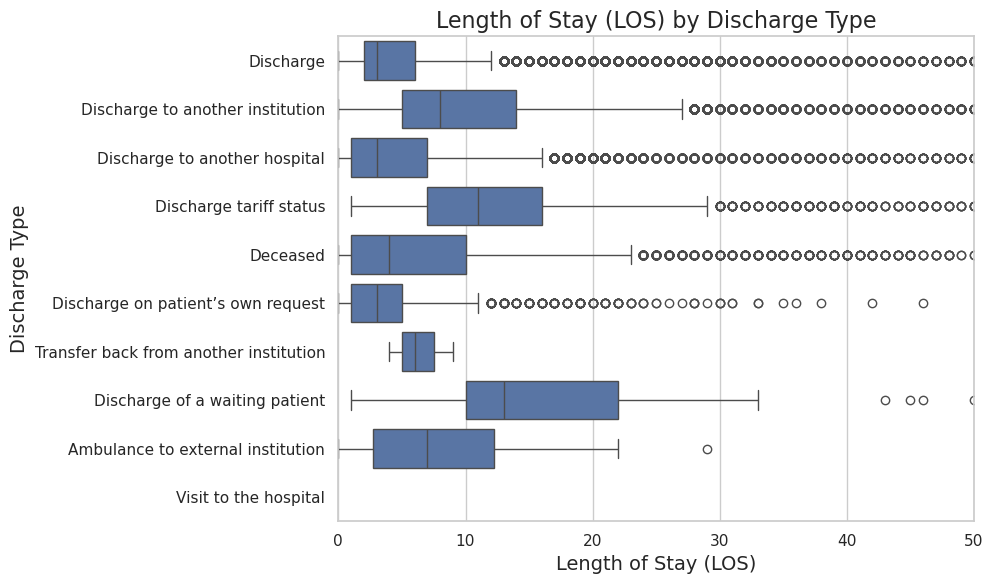

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='discharge_type', x='length_of_stay_days', data=merged_data)
#sns.despine()
plt.title('Length of Stay (LOS) by Discharge Type', fontsize=16)
plt.ylabel('Discharge Type', fontsize=14)
plt.xlabel('Length of Stay (LOS)', fontsize=14)
plt.tight_layout()
plt.xlim(0, 50) # By limiting the x-axis to 50, we focus on the main range of LOS, excluding extreme values for a clearer comparison.
plt.show()

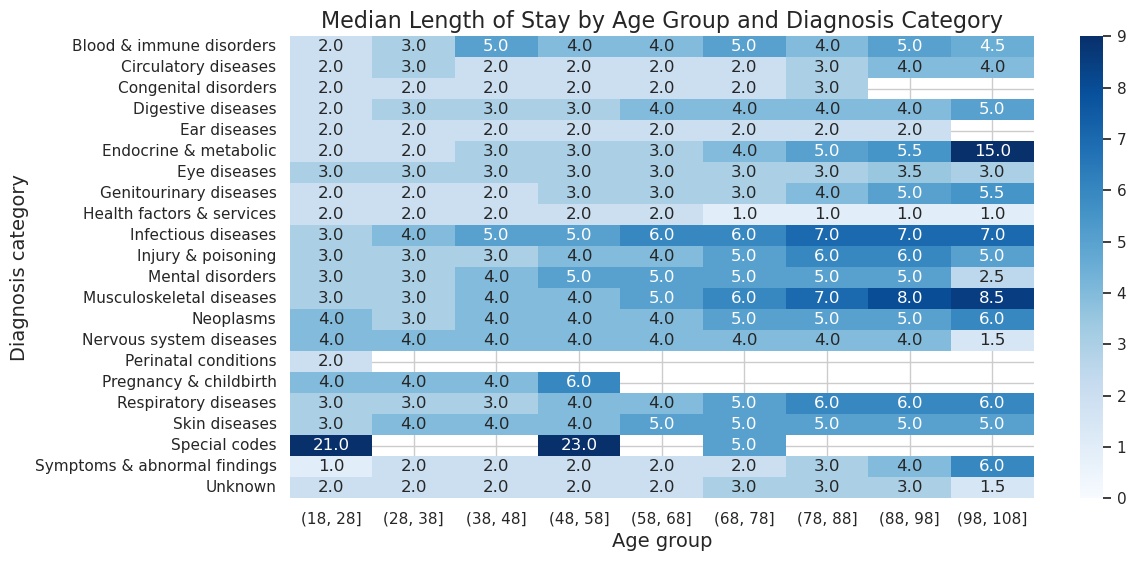

In [27]:
# Heatmap to visualize the median length of stay (LOS) for patients across different diagnosis categories and age groups.

merged_data['age_group'] = pd.cut(merged_data['age'], bins=np.arange(18, 110, 10))  # Create age groups
pivot_table = merged_data.pivot_table(index='diagnosis_category', columns='age_group', values='length_of_stay_days', aggfunc='median', observed=False)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt=".1f", vmin=0, vmax=9)
plt.title('Median Length of Stay by Age Group and Diagnosis Category', fontsize=16)
plt.xlabel('Age group', fontsize=14)
plt.ylabel('Diagnosis category', fontsize=14)
plt.show()



### 2.4 Summary statistics of laboratory test results

In [33]:
# Selecting columns from index 8 onward
merged_data.iloc[:, 8:].describe()

,ALAT,AP,ASAT,BASm#n,BIg,CA,CK,CO-HB,CR,CRP,...,Quicks,RDWn,THZn,TNThsn,Tbga,UREA,pCO2,pH,pO2,tHb
count,109653.000000,80227.000000,111522.000000,70557.000000,80361.000000,85871.000000,84380.000000,46672.000000,220171.000000,215743.000000,...,192167.000000,240903.000000,241128.000000,63594.000000,46657.000000,101400.000000,45883.000000,46411.000000,45428.00000,53924.000000
mean,51.270581,114.015431,61.479080,0.039067,15.337154,2.272675,356.613937,1.369311,94.735601,32.954177,...,12.598830,14.004517,235.961149,295.079564,36.706479,8.410937,39.210361,7.377514,86.75656,121.421556
std,212.815072,133.563943,320.152127,0.040337,32.310975,0.167833,3278.211458,1.026956,78.743339,62.214480,...,9.306838,2.029728,95.359648,1765.221906,0.792179,6.592886,9.197037,0.083055,69.36976,24.443516
min,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,8.100000,0.100000,0.000000,0.000000,25.600000,0.000000,5.000000,6.801000,2.00000,0.000000
25%,15.000000,64.000000,19.000000,0.020000,6.000000,2.180000,61.000000,0.800000,63.000000,2.000000,...,10.700000,12.800000,180.000000,10.600000,36.400000,4.700000,34.000000,7.343000,42.00000,105.000000
50%,22.000000,82.000000,26.000000,0.030000,9.000000,2.280000,98.000000,1.200000,77.000000,6.000000,...,11.200000,13.400000,225.000000,22.500000,37.000000,6.400000,38.000000,7.389000,67.00000,123.000000
75%,36.000000,114.000000,39.000000,0.050000,14.000000,2.360000,183.000000,1.600000,99.000000,32.000000,...,12.000000,14.600000,278.000000,60.375000,37.000000,9.500000,43.000000,7.427000,100.00000,139.000000
max,11844.000000,4283.000000,23743.000000,5.100000,781.000000,5.370000,589210.000000,31.000000,2995.000000,697.000000,...,608.000000,43.200000,3458.000000,120036.000000,42.000000,87.000000,200.000000,7.761000,562.00000,244.000000
